In [4]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import theano
import theano.tensor as T


Using gpu device 0: GeForce GT 650M


#Getting the data

In [2]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader("F", 'yahoo', start, end)

#Explore data

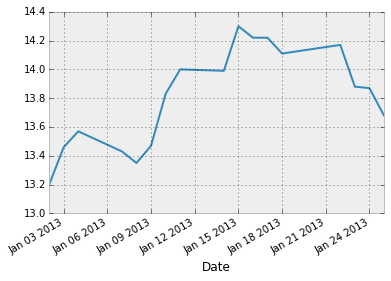

In [5]:
f.Close.plot()

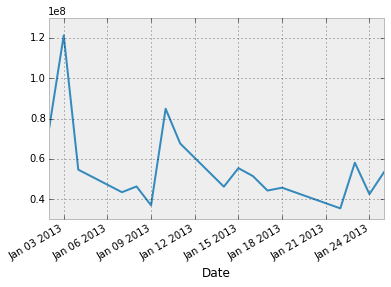

In [17]:
f.Volume.plot()

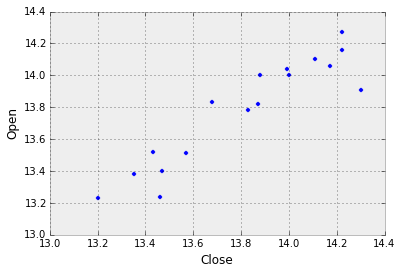

In [24]:
f.plot(kind='scatter', x='Close', y='Open')

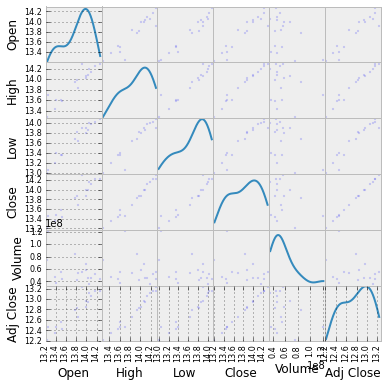

In [27]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(f, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [7]:
f.describe()

,Open,High,Low,Close,Volume,Adj Close
count,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000
mean,13.779412,13.900000,13.644706,13.808824,5.665848e+07,12.778609
std,0.334449,0.315099,0.351196,0.345866,2.118857e+07,0.320063
min,13.230000,13.280000,13.000000,13.200000,3.546790e+07,12.215207
25%,13.510000,13.610000,13.350000,13.470000,4.429930e+07,12.465064
50%,13.830000,13.980000,13.790000,13.870000,5.145340e+07,12.835221
75%,14.040000,14.130000,13.900000,14.110000,5.812220e+07,13.057316
max,14.270000,14.300000,14.070000,14.300000,1.212847e+08,13.233141


#Data Cleaning

In [37]:
Xtr = f[['Open','Low','High']].values.astype(np.float32)
Xtr

array([[ 13.22999954,  13.        ,  13.27999973],
       [ 13.23999977,  13.05000019,  13.69999981],
       [ 13.51000023,  13.35000038,  13.60999966],
       [ 13.52000046,  13.35000038,  13.57999992],
       [ 13.38000011,  13.19999981,  13.43000031],
       [ 13.39999962,  13.39000034,  13.60000038],
       [ 13.77999973,  13.68000031,  13.93999958],
       [ 14.        ,  13.89999962,  14.06999969],
       [ 14.03999996,  13.85999966,  14.07999992],
       [ 13.90999985,  13.89000034,  14.30000019],
       [ 14.15999985,  14.01000023,  14.25      ],
       [ 14.27000046,  14.06999969,  14.30000019],
       [ 14.10000038,  13.97000027,  14.13000011],
       [ 14.06000042,  14.        ,  14.18999958],
       [ 14.        ,  13.78999996,  14.02000046],
       [ 13.81999969,  13.81000042,  13.97999954],
       [ 13.82999992,  13.64000034,  13.84000015]], dtype=float32)

In [38]:
Ytr = f.Close.values.astype(np.float32)
Ytr

array([ 13.19999981,  13.46000004,  13.56999969,  13.43000031,
        13.35000038,  13.47000027,  13.82999992,  14.        ,
        13.98999977,  14.30000019,  14.22000027,  14.22000027,
        14.10999966,  14.17000008,  13.88000011,  13.86999989,  13.68000031], dtype=float32)

# Modeling

In [39]:
rng = np.random

In [44]:
def define_fit_model(dataset_x, dataset_y, learning_rate = 1e-4, training_steps = 10000):
    N = len(dataset_x[0])
    x = T.matrix("x")
    y = T.vector("y")
    w = theano.shared(rng.randn(N), name="w")
    b = theano.shared(0., name="b")
    Hx = T.dot(x,w) + b
    cost = T.mean(T.sqr(Hx - y))
    gw, gb = T.grad(cost=cost, wrt=[w, b])
    train = theano.function(inputs=[x,y],outputs=[Hx,cost], updates=((w, w - learning_rate * gw), (b, b - learning_rate * gb)))
    predict = theano.function(inputs=[x], outputs=Hx)
    for i in range(training_steps):
        pred, err = train(dataset_x, dataset_y)
    return predict, w, b

In [45]:
predict, w, b = define_fit_model(Xtr,Ytr)

In [46]:
"Model that was fit from data:\n {}, {}".format( w.get_value(), b.get_value() )

'Model that was fit from data:\n [-0.26006003  1.27940998 -0.01000628], 0.0737490925797'

#Visualize, Summarize, Apply

##predict

In [51]:
Ypredict = predict(Xtr)

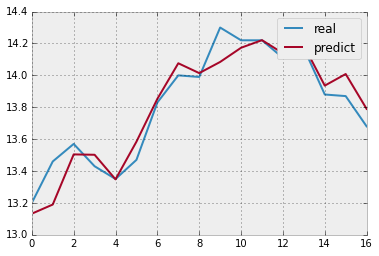

In [54]:
plt.plot(Ytr, label='real')
plt.plot(Ypredict, label='predict')
plt.legend();

##testing

In [55]:
start = datetime.datetime(2013, 2, 1)
end = datetime.datetime(2013, 2, 27)
f = web.DataReader("F", 'yahoo', start, end)

In [56]:
Xts = f[['Open','Low','High']].values.astype(np.float32)
Yts = f.Close.values.astype(np.float32)

In [57]:
Ytest_predict = predict(Xts)

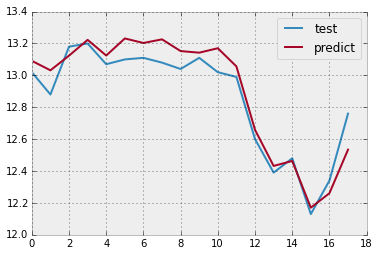

In [58]:
plt.plot(Yts, label='test')
plt.plot(Ytest_predict, label='predict')
plt.legend();